# Análise dos Microdados da Vacina do Covid-19

In [2]:
import pandas as pd
import matplotlib

#para pegar a os microdados das vacinas aplicadas 
microdadosVacina = pd.read_csv("C:\\Users\\diogo\\Downloads\\vacinados.csv", sep=";", encoding='utf-8')
microdadosVacina

,cpf,nome,sexo,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),219VCD270W,2.0,2021-10-19,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),216VCD206Z,1.0,2021-07-26,DRIVE THRU PARQUE DE EXPOSIÇÃO
2,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2.0,2021-03-04,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO
3,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-11,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,3 - COMIRNATY (PFIZER),32010BD,3.0,2021-10-07,CENTRO DE VACINAÇÃO UNINASSAU
...,...,...,...,...,...,...,...,...,...
3407293,***.619.454-**,NECIRA FERREIRA DE SANTANA,FEMININO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407294,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210052A,2.0,2021-03-11,DRIVE THRU GERALDÃO
3407295,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407296,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-17,DRIVE THRU GERALDÃO


In [5]:
microdadosVacina = microdadosVacina.drop(columns=['cpf','nome','grupo','vacina','lote','data_vacinacao','sexo',])
microdadosVacina.head()

,dose,local_vacinacao
0,2.0,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,1.0,DRIVE THRU PARQUE DE EXPOSIÇÃO
2,2.0,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO
3,1.0,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
4,3.0,CENTRO DE VACINAÇÃO UNINASSAU


In [6]:
#tirando os valores
micro = microdadosVacina.dropna()

In [7]:
#separando para trabalhar apenas com as colunas de local de vacinaçao e a dose aplicada
colunasSelecionadas_LocaisVacinas = ['local_vacinacao']
colunasSelecionadas_DosesVacinas = ['dose']
microdadosVacina_Locais = microdadosVacina.filter(items = colunasSelecionadas_LocaisVacinas)
microdadosVacina_Doses = microdadosVacina.filter(items = colunasSelecionadas_DosesVacinas)

In [8]:
#fazendo a contagem para ver quantos locais de vacinaçao tem e quantas doses foram aplicadas em cada local
microdadosVacina_Locais.value_counts()

local_vacinacao                                   
DRIVE THRU PARQUE DA MACAXEIRA                        225295
CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA           220034
DRIVE THRU GERALDÃO                                   215437
DRIVE THRU - DNOCS                                    197749
DRIVE THRU DA UFPE                                    177421
                                                       ...  
DRIVE THRU DNOCS                                           8
CENTRO DE VACINAÇÃO COMPAZ ARIANO SUASSUNA                 7
USF COQUE BERILO PERNAMBUCANO (UNIDADE MÓVEL)              3
CENTRO DE REFERÊNCIA EAPV COVID-19 (UNIDADE MÓVEL)         2
DRIVE THRU - UNICAP (UNIDADE MÓVEL)                        1
Length: 141, dtype: int64

In [9]:
#fazendo a contagem da distribuiçao de quantas vacinas foram aplicadas de cada dose
microdadosVacina_Doses.value_counts()

dose
1.0     1519688
2.0     1312330
3.0      574350
4.0         929
dtype: int64

array([[<AxesSubplot: title={'center': 'dose'}>]], dtype=object)

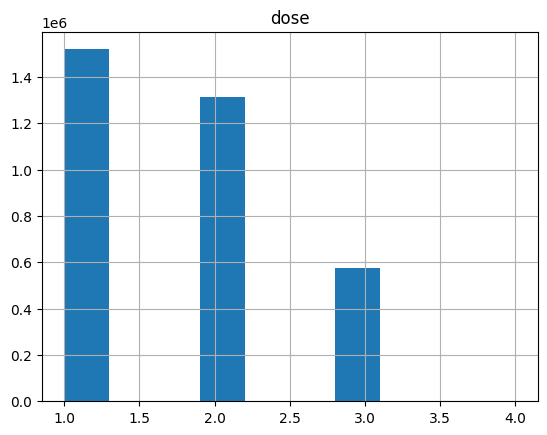

In [13]:
#grafico de histograma da quantidade de doses
microdadosVacina_Doses.hist()

In [15]:
#descobrindo a porcentagem de quantas pessoas tomaram cada dose
distInDoses = microdadosVacina_Doses.value_counts()
percentInDoses = [100*x/distInDoses.sum() for x in distInDoses]
print(percentInDoses)

[44.60098429928474, 38.515280587515555, 16.856470099319196, 0.027265013880504105]


In [18]:
#ta dando erro esse aq, nao consegui descobrir qual o erro
#qntd_outros_total = (microdadosVacina['local_vacinacao'] != 'DRIVE THRU PARQUE DA MACAXEIRA')and(microdadosVacina['local_vacinacao'] != 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA')and(microdadosVacina['local_vacinacao'] != 'DRIVE THRU - DNOCS')and(microdadosVacina['local_vacinacao'] != 'DRIVE THRU GERALDÃO')and(microdadosVacina['local_vacinacao'] != 'DRIVE THRU DA UFPE')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [19]:
#a quantidade dos outro ta como comentario pq ta dando errado ali encima
qntd_maior_local = microdadosVacina['DRIVE THRU PARQUE DA MACAXEIRA'].count()[0]
qntd_seg_maior_local = microdadosVacina['CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA'].count()[0]
qntd_ter_maior_local = microdadosVacina['DRIVE THRU GERALDÃO'].count()[0]
qntd_quar_maior_local = microdadosVacina['DRIVE THRU - DNOCS'].count()[0]
qntd_quin_maior_local = microdadosVacina['DRIVE THRU DA UFPE'].count()[0]
#qntd_outros = microdadosVacina[qntd_outros_total].count()[0]

valores = [qntd_maior_local, qntd_seg_maior_local, qntd_ter_maior_local, qntd_quar_maior_local, qntd_quin_maior_local]
rotulos = ['DRIVE THRU PARQUE DA MACAXEIRA','CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA', 'DRIVE THRU GERALDÃO', 'DRIVE THRU - DNOCS', 'DRIVE THRU DA UFPE']

#aqui vai ficar faltando so a criaçao do grafico em si

KeyError: 'DRIVE THRU PARQUE DA MACAXEIRA'

In [2]:
dedededed

array([[<AxesSubplot: title={'center': 'dose'}>]], dtype=object)